In [12]:
import pandas as pd
from IPython.core.display import display
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806,0.930830,0.069170
std,8.601545,23.310593,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104,0.253994,0.253994
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000,1.000000,0.000000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000,1.000000,0.000000
75%,3.677082,12.000000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000,1.000000,0.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,1.000000


a)
El dataset cuenta con un total de 14 features para cada muestras, cada uno de estos corresponde a caracteristicas que tiene la casa de la muestra, siendo la caracteristica que corresponde al precio de la casa el valor a predecir. Es una transformación estandar que se realiza para entregar las variables categoricas como dato, existe la posibilidad de convertir una variable categorica a un vector de enteros o varios vectores binarios (1 hot encoding), siendo la segunda opción que es la tomada aquí mejor que la otra, ya que si se escribe un vector de enteros con cada entero representando un valor categorico se está dando una herarquización sobre los datos lo cual puede con corresponder con la realidad.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
if 'MEDV' in df_train.columns:
    y_train = df_train.pop('MEDV').values.reshape(-1,1)
X_train_scaled = scaler.fit_transform(df_train)
if 'MEDV' in df_test.columns:
    y_test = df_test.pop('MEDV').values.reshape(-1,1)
X_test_scaled = scaler.transform(df_test)

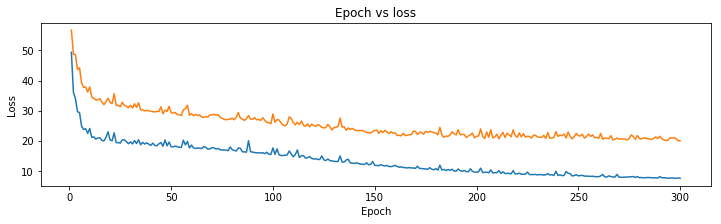

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

mse_train = list()
mse_val = list()
for i in range(300):
    model.fit(X_train_scaled, y_train, epochs=1, verbose=0, validation_data=(X_test_scaled, y_test))
    mse_train.append(model.evaluate(X_train_scaled, y_train, verbose=0))
    mse_val.append(model.evaluate(X_test_scaled, y_test, verbose=0))

step_list = list(range(1,301))
fig = plt.figure(figsize = (12,3))
plt.plot(step_list, mse_train, '-', step_list, mse_val, '-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs epoch')
plt.show()

b) Para esta parte en que se busca ver como se comporta en terminos de rendimiento la red cuando se aplica una cierta cantidad de epochs, se puede ver en el gráfico que a medida que se incluyen ciclos se lográ una función de perdida con menor valor, esto indica que a mayor entrenamiento, mejor preparada estará la red para hacer estimaciones futuras. No se lográ apreciar divergencia a medida que se incluyen pasos, sino que al contrario se ve que la función tiende a converger.

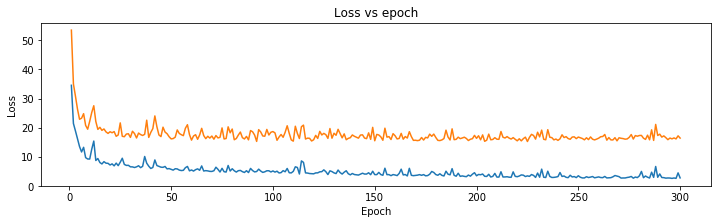

In [15]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

mse_train = list()
mse_val = list()
for i in range(300):
    model.fit(X_train_scaled, y_train, epochs=1, verbose=0, validation_data=(X_test_scaled, y_test))
    mse_train.append(model.evaluate(X_train_scaled, y_train, verbose=0))
    mse_val.append(model.evaluate(X_test_scaled, y_test, verbose=0))

step_list = list(range(1,301))
fig = plt.figure(figsize = (12,3))
plt.plot(step_list, mse_train, '-', step_list, mse_val, '-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs epoch')
plt.show()

c) Al igual que para el caso anterior cuando la capa oculta hace uso de función de activación relu, se puede ver que la función de perdida disminuye su valor en función de la cantidad de epoch. Con relu se puede notar que la convergencia es a una mayor velocidad que para el caso en que se usa activación sigmoide, así como también que coverge a un mejor valor, es decir, la red está mejor entrenada.

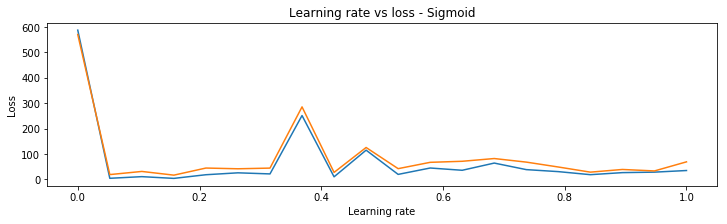

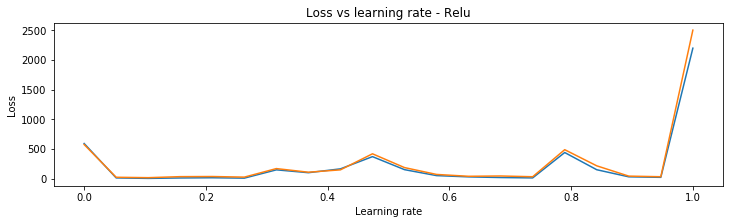

In [19]:
#d
from keras.optimizers import RMSprop
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
epochs = 50

mse_train = list()
mse_val = list()
for i in range(n_lr):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = RMSprop(lr=lear_rate[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0, validation_data=(X_test_scaled, y_test))
    mse_train.append(model.evaluate(X_train_scaled, y_train, verbose=0))
    mse_val.append(model.evaluate(X_test_scaled, y_test, verbose=0))

fig = plt.figure(figsize = (12,3))
plt.plot(lear_rate, mse_train, '-', lear_rate, mse_val, '-')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss - Sigmoid')
plt.show()

mse_train = list()
mse_val = list()
for i in range(n_lr):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = RMSprop(lr=lear_rate[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0, validation_data=(X_test_scaled, y_test))
    mse_train.append(model.evaluate(X_train_scaled, y_train, verbose=0))
    mse_val.append(model.evaluate(X_test_scaled, y_test, verbose=0))

fig = plt.figure(figsize = (12,3))
plt.plot(lear_rate, mse_train, '-', lear_rate, mse_val, '-')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Loss vs learning rate - Relu')
plt.show()

d) Para esta parte se escoge de manera arbitraria una cantidad de epoch de 50 (se escoge un valor bajo por temas de tiempo). Cuando se intena variar el valor de learning rate, se llega a encontrar valores NaN durante el entrenamiento, esto puede deberse por ejemplo a problemas de exploding gradients. Para evitar esto se decide cambiar el optimizador, usando RMSprop y repitienedo la experiencia se lográ llegar a un resultado, mostrado en los gráficos. De la info que desprenden los gráficos no se puede dicernir o visualizar un patrón claro de convergencia, se puede observar si que no para todas las tasas de aprendizaje se encuentra un valor de error igual.

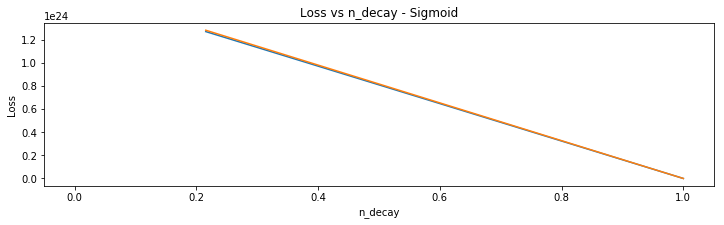

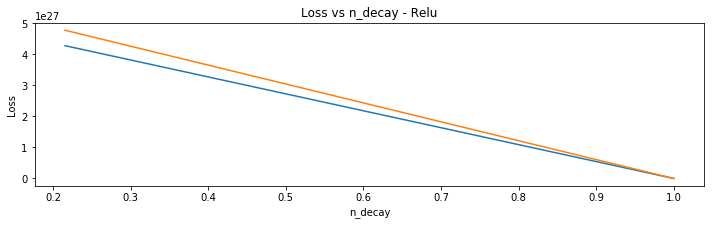

In [24]:
#e
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
epochs = 50

mse_train = list()
mse_val = list()
for i in range(n_decay):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.2, decay=lear_decay[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0, validation_data=(X_test_scaled, y_test))
    mse_train.append(model.evaluate(X_train_scaled, y_train, verbose=0))
    mse_val.append(model.evaluate(X_test_scaled, y_test, verbose=0))

fig = plt.figure(figsize = (12,3))
plt.plot(lear_decay, mse_train, '-', lear_decay, mse_val, '-')
plt.xlabel('n_decay')
plt.ylabel('Loss')
plt.title('Loss vs n_decay - Sigmoid')
plt.show()

mse_train = list()
mse_val = list()
for i in range(n_decay):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.2, decay=lear_decay[i])
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0, validation_data=(X_test_scaled, y_test))
    mse_train.append(model.evaluate(X_train_scaled, y_train, verbose=0))
    mse_val.append(model.evaluate(X_test_scaled, y_test, verbose=0))

fig = plt.figure(figsize = (12,3))
plt.plot(lear_decay, mse_train, '-', lear_decay, mse_val, '-')
plt.xlabel('n_decay')
plt.ylabel('Loss')
plt.title('Loss vs n_decay - Relu')
plt.show()

e) En esta parte en que se varía el decay del learning rate se puede ver que entre mayor este valor se obtiene un mejor valor de loss, se puede ver como se comporta de forma lineal.

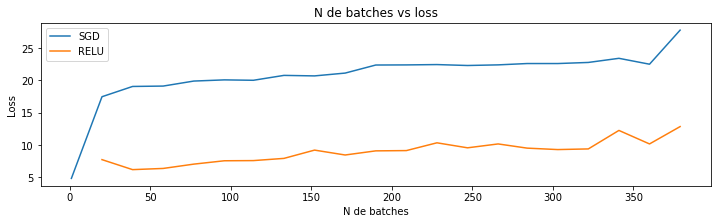

In [28]:
#f
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))

mse_train_sig = list()
for i in range(n_batches):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=50, verbose=0, batch_size=int(batch_sizes[i]))
    mse_train_sig.append(model.evaluate(X_train_scaled, y_train, verbose=0))

mse_train_relu = list()
for i in range(n_batches):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=50, verbose=0, batch_size=int(batch_sizes[i]))
    mse_train_relu.append(model.evaluate(X_train_scaled, y_train, verbose=0))

    
fig = plt.figure(figsize = (12,3))
plt.plot(batch_sizes, mse_train_sig, '-', label = "SGD") 
plt.plot(batch_sizes, mse_train_relu, '-', label = "RELU")
plt.xlabel('N de batches')
plt.ylabel('Loss')
plt.title('N de batches vs loss')
plt.legend()
plt.show()

f) Para ambos casos en que la capa oculta tiene activación sigmoide y en la cual es relu, se puede ver como a medida que el número de batches es mayor la función de perdida obtiene una magnitud más grande, entonces se puede decir que, entre menor es la cantidad de elementos con que se trabaja en cada batch cuando se entrena se obtienen mejores resultados. Por esto que para obtener mejores resultados al momento de entrenar una red neuronal es mejor ocupar un batch pequeño.

In [26]:
#g
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

optimizer_list = list([SGD(), Adam(), RMSprop(), Adagrad(), Adadelta()])
mse_train = list()
mse_test = list()

for i in range(len(optimizer_list)):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    moptimizer = optimizer_list[i]
    model.compile(optimizer=moptimizer, loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
    mse_train.append(model.evaluate(X_train_scaled, y_train, verbose=0))
    mse_test.append(model.evaluate(X_test_scaled, y_test, verbose=0))

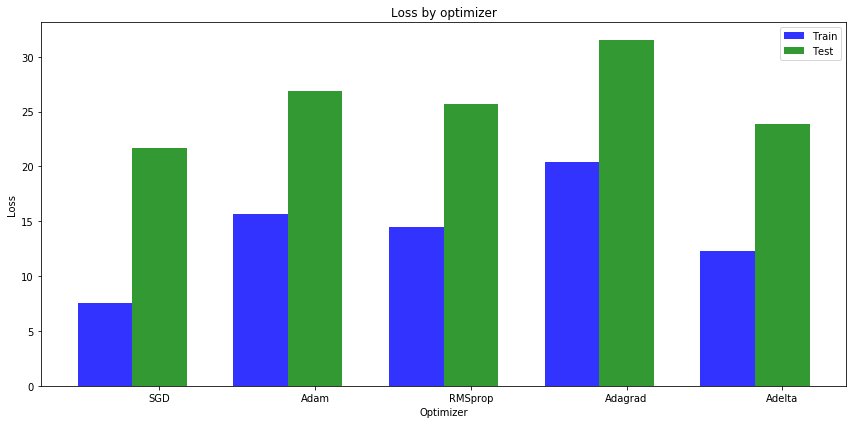

In [27]:
n_groups = 5
fig = plt.figure(figsize = (12,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, mse_train, bar_width, alpha=opacity, color='b', label='Train')
rects2 = plt.bar(index + bar_width, mse_test, bar_width, alpha=opacity, color='g', label='Test')
 
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.title('Loss by optimizer')
plt.xticks(index + bar_width, ('SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adelta'))
plt.legend()
 
plt.tight_layout()
plt.show()

g) En esta parte se puede ver como se comporta en terminos de rendimiento cada uno de los optimizadores ofrecidos por keras, a simple vista se puede decir que no se presentan grandes diferencias y que todos los optimizadores llegan a un resultado similar con valores parecidos para la función de perdida tanto con el set de train como el de tets. Aunque se puede decir con claridad que SGD es el que obtiene mejores resulatos y que Adagrad es el peor para este caso en que se busca predecir el precio de casas.

In [47]:
#h
from keras.regularizers import l1, l2

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_sig_nol = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_rel_nol = model.evaluate(X_test_scaled, y_test, verbose=0)
    
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_sig_1l1 = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_rel_1l1 = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', W_regularizer=l1(0.01)))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_sig_2l1 = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform', W_regularizer=l1(0.01)))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_rel_2l1 = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_sig_1l2 = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_rel_1l2 = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', W_regularizer=l2(0.01)))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_sig_2l2 = model.evaluate(X_test_scaled, y_test, verbose=0)

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform', W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform', W_regularizer=l2(0.01)))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
loss_rel_2l2 = model.evaluate(X_test_scaled, y_test, verbose=0)

tabla = pd.DataFrame(index = ['Sigmoid', 'Relu'], columns=['Sin L', '1 L1', '2 L1', '1 L2', '2L2'])
tabla.ix[0,:] = list([loss_sig_nol, loss_sig_1l1, loss_sig_2l1, loss_sig_1l2, loss_sig_2l2])
tabla.ix[1,:] = list([loss_rel_nol, loss_rel_1l1, loss_rel_2l1, loss_rel_1l2, loss_rel_2l2])
display(tabla)

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:55: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, 

,Sin L,1 L1,2 L1,1 L2,2L2
Sigmoid,20.8106,21.2868,23.9211,22.1653,24.062
Relu,17.2377,19.9124,19.1643,17.4024,17.4964


h) Para esta parte se establece el número de epoch en 300 y el learning rate en 0.1, al momento de entrenar con diferentes paramtros de regularización se puede dar cuenta que tanto para la regularzación L1 y L2 se obtiene mejores resultados cuando no se aplica regularizción a la red. Quizás esto se deba a que antes se deba buscar unos mejores valores para los otros parametros como lo son el learning rate por ejemplo.

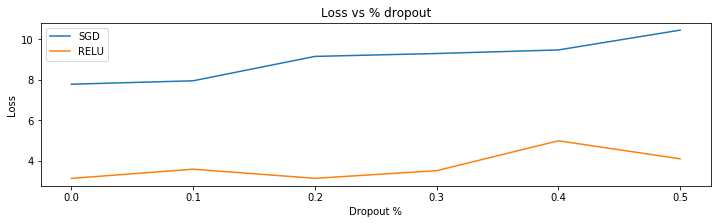

In [53]:
#i
drop_vals = list([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
from keras.layers.core import Dropout

mse_train_sig = list()
for i in range(len(drop_vals)):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(drop_vals[i]))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
    mse_train_sig.append(model.evaluate(X_train_scaled, y_train, verbose=0))

mse_train_relu = list()
for i in range(len(drop_vals)):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation('relu'))
    model.add(Dropout(drop_vals[i]))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=300, verbose=0)
    mse_train_relu.append(model.evaluate(X_train_scaled, y_train, verbose=0))

fig = plt.figure(figsize = (12,3))
plt.plot(drop_vals, mse_train_sig, '-', label = "SGD") 
plt.plot(drop_vals, mse_train_relu, '-', label = "RELU")
plt.xlabel('Dropout %')
plt.ylabel('Loss')
plt.title('Loss vs % dropout')
plt.legend()
plt.show()

i) Para observar el comportamiento de una red con dropout al igual que en instancias anteriores se fijan parámetros y se cambiar el valor de lo que se está observando, en este caso el porcentaje de dropout. Se utiliza tan solo una capa de dropout la cual se ubica entre la capa ocult ay la salida. Al igual que en casos anteriores se puede ver como se obtienen mejores resultados para la red entrenada con activación relu, en lo que respecta al dropout se puede observar para ambos casos que no existe una diferencia significativa entre un dropout pequeño y uno de mayor magnitud, así como también se puede decir que pareciera mejor para este dataset y red en particular no hacer uso de dropout. Como se dijo anteriormente quizás se deba buscar mejores parámetros para trabajar con dropout.